In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import hdbscan
from umap import UMAP
from scripts.data_cleaner import filter_top_cpv_categories
from scripts.preprocess_pipeline import create_pipeline_cat

from sklearn.decomposition import PCA

from scripts.data_cleaner import filter_top_cpv_categories
from sklearn.model_selection import train_test_split
from scripts.preprocess_pipeline import create_pipeline_cat


/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df = pd.read_csv('../data/data_clean.csv', encoding='utf-8')

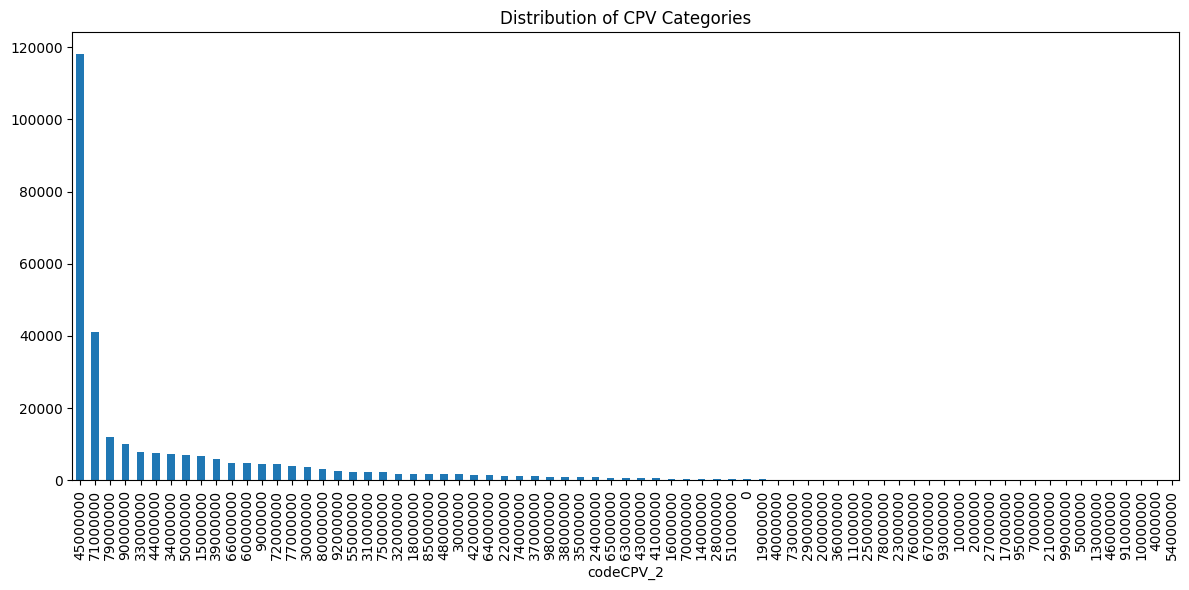

In [3]:

plt.figure(figsize=(12, 6))
df['codeCPV_2'].value_counts().plot(kind='bar')
plt.title('Distribution of CPV Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

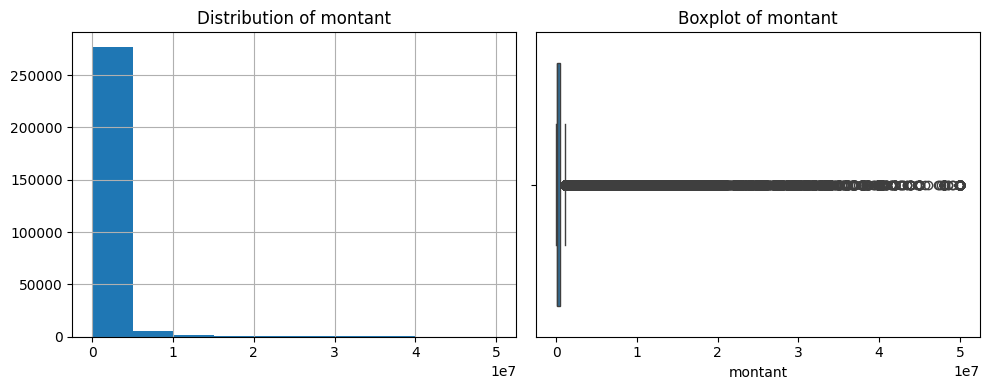

In [ ]:
for col in ['montant', 'dureeEnMois']:  # Add your key numerical columns
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        df[col].hist()
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=col, data=df)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [5]:

df_cpv = filter_top_cpv_categories(df, top_n=40, cpv_column='codeCPV_2')

Filtered from 73 to 40 CPV categories, keeping 283975 rows out of 286850


In [6]:
df_cpv

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,lieuExecution_typeCode,idAccordCadre,source_open_data,codeCPV_FR,codeCPV_2,codeCPV_3,codeCPV_4,codeCPV_5,codeCPV_2_3,annee
0,2154005160001320242024-LOT04,20242024-LOT04,Marché,21540051600013,COMMUNE DE BATILLY,215400516.0,78885470100018,SIRET,ACOMETAL,788854701.0,...,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux de charpente,45000000,45200000,45260000,45261000,45200000,2024
1,243500667002882021M226MO,2021M226MO,Marché,24350066700288,CC VAL D'ILLE-AUBIGNE,243500667.0,38373211200032,SIRET,UNIVERS,383732112.0,...,Code postal,NaN,data.gouv.fr decp-2024.json,Services d'architecture,71000000,71200000,71200000,71200000,71200000,2021
2,249710047000472024SS_PRD_TRV,2024SS_PRD_TRV,Marché,24971004700047,COMMUNAUTE DE COMMUNES DE MARIE GALANTE,249710047.0,43387249600016,SIRET,COTRAM B.T.P.,433872496.0,...,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux de construction de stations d'épuratio...,45000000,45200000,45230000,45232000,45200000,2024
3,6254801990001124-0806-L2,24-0806-L2,Marché,62548019900011,"LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...",625480199.0,55204695502544,SIRET,ENGIE ENERGIE SERVICES,552046955.0,...,Code département,NaN,data.gouv.fr decp-2024.json,Services de réparation et d'entretien de chauf...,50000000,50700000,50720000,50720000,50000000,2024
4,20002563300013202424011BCR,202424011BCR,Marché,20002563300013,SI DE RESTAURATION COLLECTIVE,200025633.0,47698032100238,SIRET,POMONA EPISAVEURS,476980321.0,...,Code postal,NaN,data.gouv.fr decp-2025-04.json,Produits alimentaires divers,15000000,15800000,15800000,15800000,15000000,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286845,243000643000452024240072,2024240072,Marché,24300064300045,COMMUNAUTE AGGLO NIMES METROPOLE,243000643.0,79386502300055,SIRET,SERVICES MAINTENANCE ENERGIES,793865023.0,...,Code postal,NaN,data.gouv.fr decp-2024.json,Services de réparation et d'entretien de chaud...,50000000,50500000,50530000,50531000,50000000,2024
286846,2133016250001720230231110,20230231110,Marché,21330162500017,COMMUNE D'EYSINES,213301625.0,44010434700032,SIRET,L.T.B. AQUITAINE,440104347.0,...,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux de peinture,45000000,45400000,45440000,45442000,45400000,2023
286847,25440109400068202323_006_02,202323_006_02,Marché,25440109400068,SYNDICAT MIXTE ATLANTIC'EAU,254401094.0,42856174000138,SIRET,CISE TP,428561740.0,...,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux relatifs aux conduites d'alimentation ...,45000000,45200000,45230000,45232000,45200000,2023
286848,219711132000152022I772-4,2022I772-4,Marché,21971113200015,COMMUNE DU GOSIER,219711132.0,41347003000029,SIRET,SOCIETE GUADELOUPEENNE DE TRAVAUX D'ENVIRONNEMENT,413470030.0,...,Code postal,NaN,data.gouv.fr decp-2025-01.json,Location de faucheuses ou de matériel agricole...,77000000,77100000,77110000,77112000,77000000,2022


In [8]:
X_train, X_test = train_test_split(df_cpv, test_size=0.2, random_state=0, stratify=df_cpv['codeCPV_2'])

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227180 entries, 61651 to 111724
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        227180 non-null  object 
 1   id                         227180 non-null  object 
 2   nature                     227180 non-null  object 
 3   acheteur_id                227180 non-null  int64  
 4   acheteur_nom               227034 non-null  object 
 5   acheteur_siren             227050 non-null  float64
 6   titulaire_id               227180 non-null  object 
 7   titulaire_typeIdentifiant  227180 non-null  object 
 8   titulaire_nom              221481 non-null  object 
 9   titulaire_siren            226328 non-null  float64
 10  objet                      227180 non-null  object 
 11  montant                    227180 non-null  float64
 12  codeCPV                    227180 non-null  object 
 13  procedure                  227

In [10]:
cat_list = ['marche_sim']
cat = cat_list[0]
pipeline = create_pipeline_cat(cat)

In [11]:
pipeline

Pipeline(steps=[('init',
                 Pipeline(steps=[('id_accord_encoder', IdAccordCadreEncoder()),
                                 ('taux_avance_categorizer',
                                  TauxAvanceCategorizer()),
                                 ('outliers_feature_rows_selector',
                                  InitTransformer(binary_columns=['sousTraitanceDeclaree',
                                                                  'origineFrance',
                                                                  'marcheInnovant',
                                                                  'idAccordCadre'],
                                                  categorical_columns=['procedure',
                                                                       'nature',
                                                                       'formePrix',
                                                                       'ccag',
                                                                       'typeGroupem...
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('string_converter',
                                                                                    StringConverter()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['procedure',
                                                                    'nature',
                                                                    'formePrix',
                                                                    'ccag',
                                                                    'typeGroupementOperateurs',
                                                                    'tauxAvance_cat',
                                                                    'codeCPV_2'])]))])),
                ('to_dataframe',
                 FunctionTransformer(func=<function create_pipeline.<locals>.<lambda> at 0x34bdaf7f0>))])

In [12]:
X_train_preproc = pipeline.fit_transform(X_train)
X_test_preproc = pipeline.transform(X_test)

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [13]:
X_train_preproc.shape


(227180, 74)

In [14]:
X_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227180 entries, 0 to 227179
Data columns (total 74 columns):
 #   Column                                                                                Non-Null Count   Dtype  
---  ------                                                                                --------------   -----  
 0   offres_recues_pipeline__offresRecues                                                  227180 non-null  float64
 1   other_num_pipeline__montant                                                           227180 non-null  float64
 2   other_num_pipeline__dureeMois                                                         227180 non-null  float64
 3   binary_pipeline__sousTraitanceDeclaree                                                227180 non-null  float64
 4   binary_pipeline__origineFrance                                                        227180 non-null  float64
 5   binary_pipeline__marcheInnovant                                         

In [16]:
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_preproc)
X_test_pca = pca.transform(X_test_preproc)

print(f"Original dimensions: {X_train_preproc.shape[1]}")
print(f"Reduced dimensions: {X_train_pca.shape[1]}")
print(f"Explained variance: {sum(pca.explained_variance_ratio_):.2f}")

Original dimensions: 74
Reduced dimensions: 16
Explained variance: 0.91


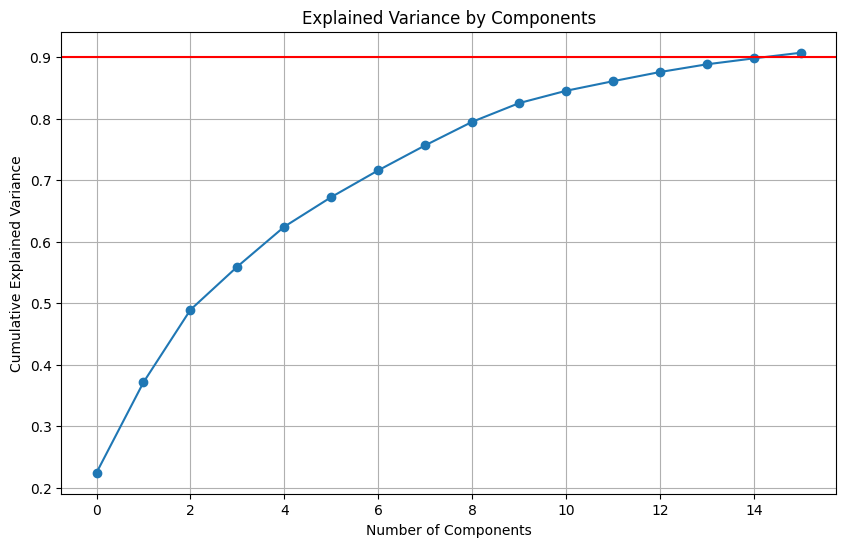

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


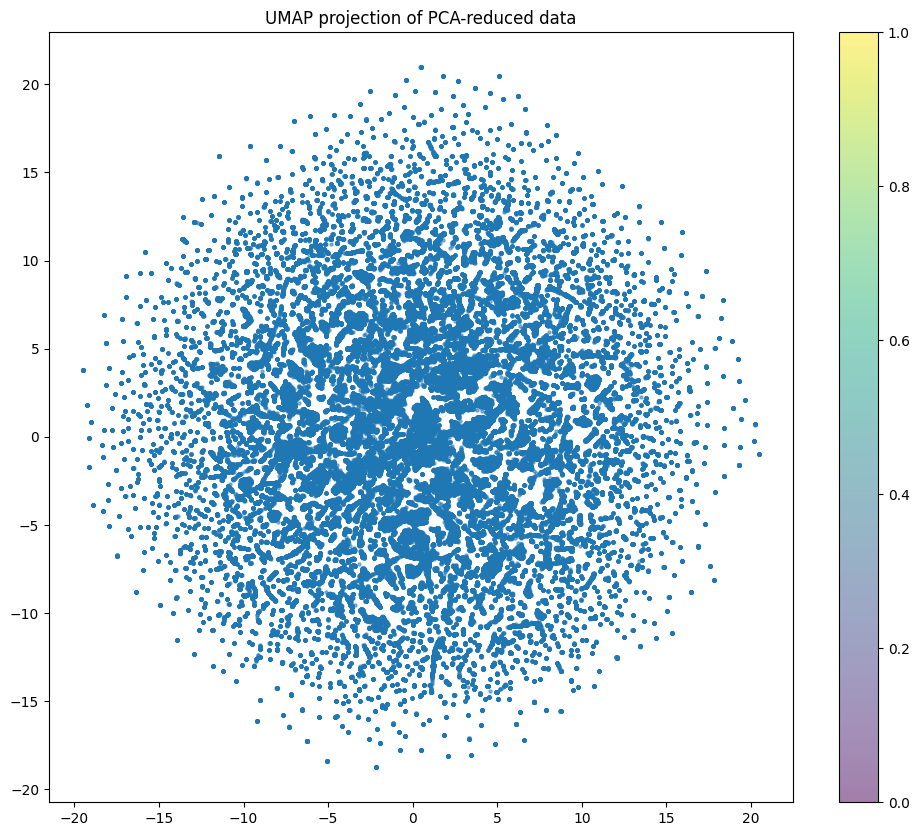

In [ ]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, random_state=42)
X_train_umap = reducer.fit_transform(X_train_pca)

# Plot UMAP projection
plt.figure(figsize=(12, 10))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], s=5, alpha=0.5)
plt.title('UMAP projection of PCA-reduced data')
plt.colorbar()
plt.show()

# HDBSCAN : clustering

In [24]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50,
                           min_samples=5,
                           cluster_selection_epsilon=0.5,
                           metric='euclidean')

cluster_labels = clusterer.fit_predict(X_train_pca)


/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [25]:

# Check cluster distribution
unique_clusters = np.unique(cluster_labels)
print(f"Number of clusters found: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print("Cluster distribution:")
for cluster in unique_clusters:
    if cluster != -1:
        print(f"Cluster {cluster}: {np.sum(cluster_labels == cluster)} samples")
print(f"Noise points: {np.sum(cluster_labels == -1)} samples")

Number of clusters found: 650
Cluster distribution:
Cluster 0: 3889 samples
Cluster 1: 71 samples
Cluster 2: 80 samples
Cluster 3: 133 samples
Cluster 4: 79 samples
Cluster 5: 117 samples
Cluster 6: 200 samples
Cluster 7: 139 samples
Cluster 8: 63 samples
Cluster 9: 93 samples
Cluster 10: 63 samples
Cluster 11: 68 samples
Cluster 12: 86 samples
Cluster 13: 119 samples
Cluster 14: 71 samples
Cluster 15: 53 samples
Cluster 16: 113 samples
Cluster 17: 82 samples
Cluster 18: 94 samples
Cluster 19: 97 samples
Cluster 20: 149 samples
Cluster 21: 80 samples
Cluster 22: 64 samples
Cluster 23: 371 samples
Cluster 24: 81 samples
Cluster 25: 143 samples
Cluster 26: 52 samples
Cluster 27: 105 samples
Cluster 28: 150 samples
Cluster 29: 56 samples
Cluster 30: 93 samples
Cluster 31: 194 samples
Cluster 32: 94 samples
Cluster 33: 83 samples
Cluster 34: 320 samples
Cluster 35: 125 samples
Cluster 36: 107 samples
Cluster 37: 59 samples
Cluster 38: 132 samples
Cluster 39: 116 samples
Cluster 40: 68 samp

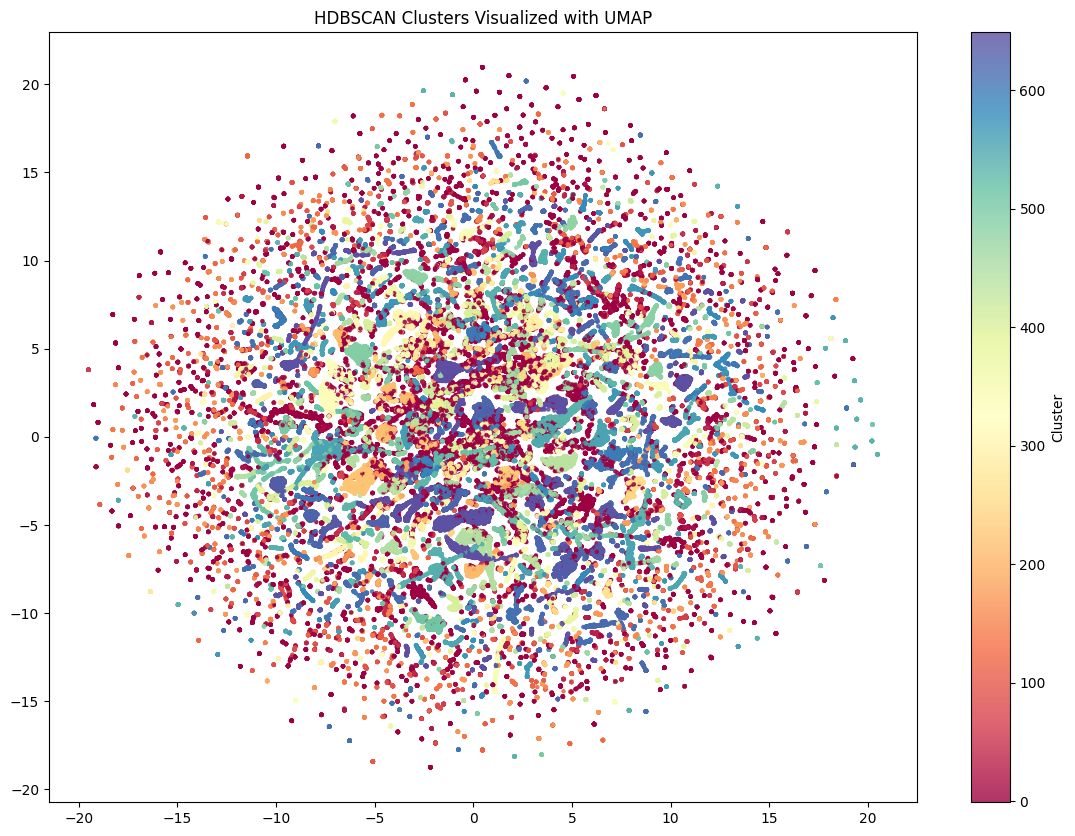

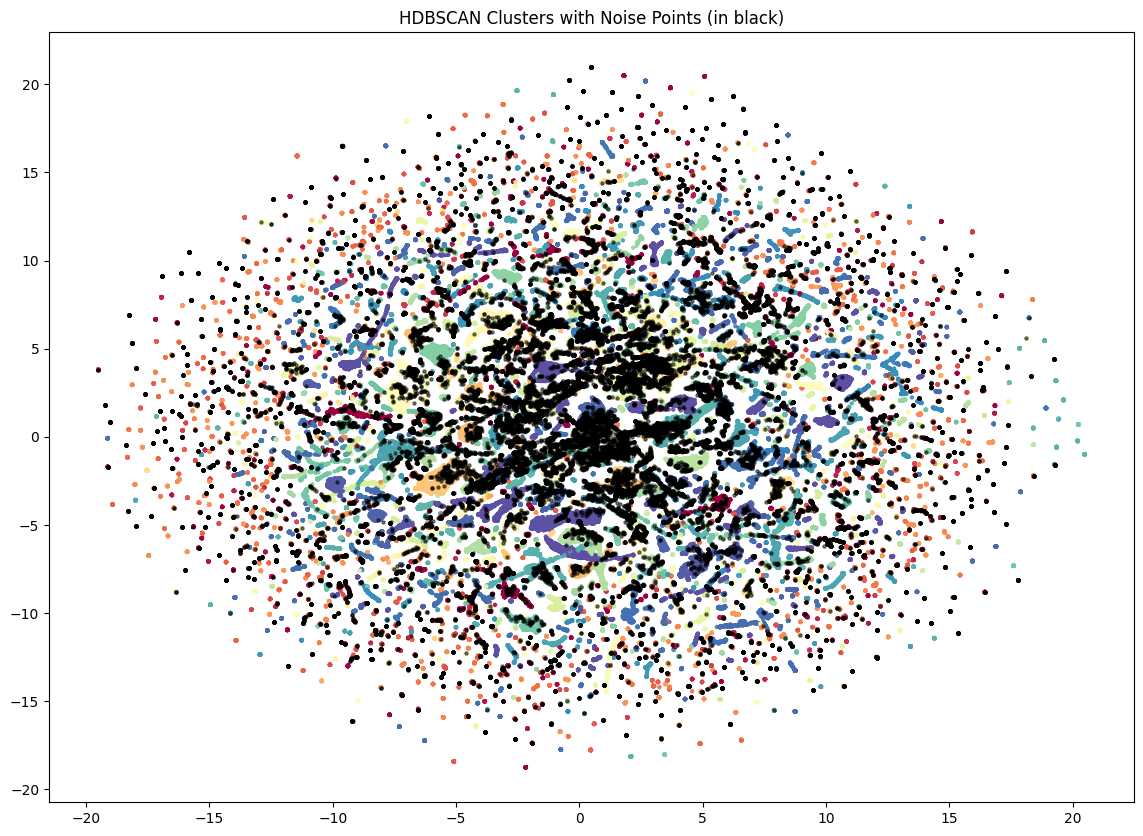

In [ ]:
# Plot clusters on UMAP projection
plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1],
                     c=cluster_labels, cmap='Spectral', s=5, alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('HDBSCAN Clusters Visualized with UMAP')
plt.show()

# Examine noise points separately
plt.figure(figsize=(14, 10))
noise_mask = (cluster_labels == -1)
plt.scatter(X_train_umap[~noise_mask, 0], X_train_umap[~noise_mask, 1],
           c=cluster_labels[~noise_mask], cmap='Spectral', s=5, alpha=0.8)
plt.scatter(X_train_umap[noise_mask, 0], X_train_umap[noise_mask, 1],
           color='black', s=5, alpha=0.5)
plt.title('HDBSCAN Clusters with Noise Points (in black)')
plt.show()

- Complex high-dimensional structure: The clusters are likely separated in dimensions not visible in this 2D projection.

- Subtle differences between clusters: The boundaries between market types are not sharp but gradual.

- Potentially many specialized market types: The large number of clusters suggests many specialized market categories with subtle differences.


Cluster 0 - Top 5 CPV categories:
codeCPV_2
45000000    1824
71000000     488
80000000     293
79000000     201
60000000     130
Name: count, dtype: int64

Cluster 1 - Top 5 CPV categories:
codeCPV_2
45000000    44
9000000     10
34000000    10
44000000     7
Name: count, dtype: int64

Cluster 2 - Top 5 CPV categories:
codeCPV_2
45000000    49
9000000     15
44000000     7
77000000     5
34000000     4
Name: count, dtype: int64

Cluster 3 - Top 5 CPV categories:
codeCPV_2
60000000    132
31000000      1
Name: count, dtype: int64

Cluster 4 - Top 5 CPV categories:
codeCPV_2
45000000    79
Name: count, dtype: int64

Cluster 5 - Top 5 CPV categories:
codeCPV_2
33000000    116
15000000      1
Name: count, dtype: int64

Cluster 6 - Top 5 CPV categories:
codeCPV_2
79000000    62
50000000    28
77000000    28
71000000    23
60000000    13
Name: count, dtype: int64

Cluster 7 - Top 5 CPV categories:
codeCPV_2
45000000    95
71000000    18
98000000     7
22000000     5
38000000     2
Name: cou

<Figure size 1500x1000 with 0 Axes>

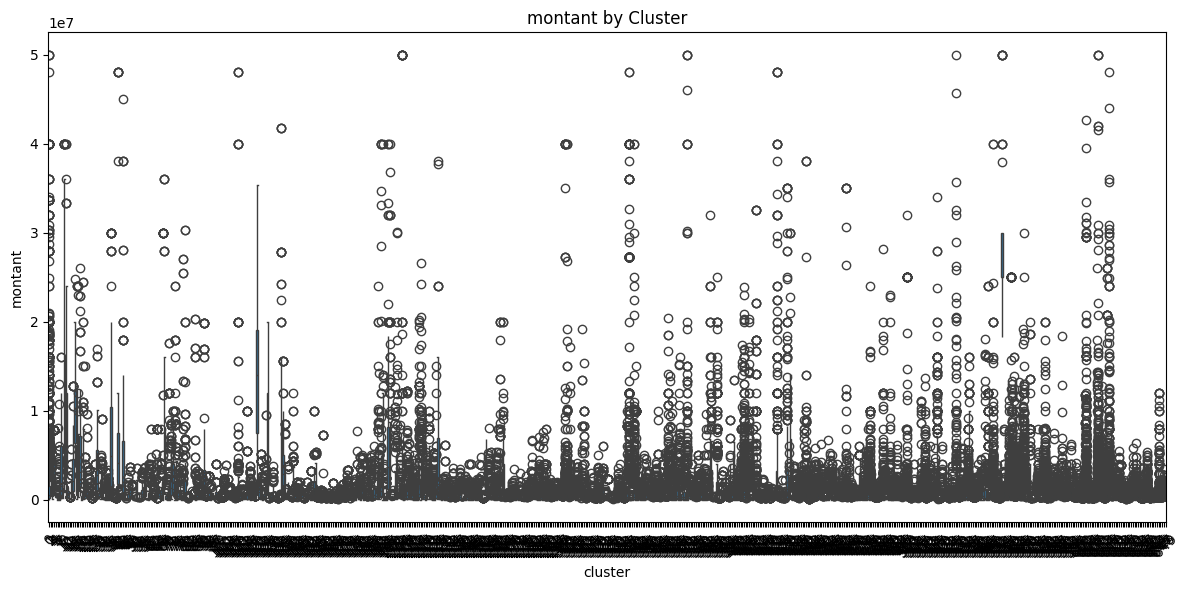

In [27]:
# Add cluster labels back to original data
X_train_with_clusters = X_train.copy()
X_train_with_clusters['cluster'] = cluster_labels

# Analyze clusters by CPV codes
plt.figure(figsize=(15, 10))
for cluster in sorted(unique_clusters):
    if cluster == -1:
        continue
    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster]
    print(f"\nCluster {cluster} - Top 5 CPV categories:")
    print(cluster_data['codeCPV_2'].value_counts().head(5))

# Analyze numerical features by cluster
for feature in ['montant', 'dureeEnMois']:
    if feature in X_train_with_clusters.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='cluster', y=feature, data=X_train_with_clusters[X_train_with_clusters['cluster'] != -1])
        plt.title(f'{feature} by Cluster')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
# Calculate silhouette score (excluding noise points)
valid_points = cluster_labels != -1
if np.sum(valid_points) > 1 and len(np.unique(cluster_labels[valid_points])) > 1:
    silhouette_avg = silhouette_score(
        X_train_pca[valid_points],
        cluster_labels[valid_points]
    )
    print(f"Silhouette Score (excluding noise): {silhouette_avg:.3f}")

Silhouette Score (excluding noise): 0.055


In [ ]:
# Create a summary table for each cluster
cluster_summary = {}

for cluster_id in unique_clusters:
    if cluster_id == -1:
        continue

    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_id]

    # Gather key statistics
    summary = {
        'size': len(cluster_data),
        'pct_of_data': len(cluster_data) / len(X_train_with_clusters) * 100,
        'top_cpv': cluster_data['codeCPV_2'].value_counts().index[0],
        'top_cpv_pct': cluster_data['codeCPV_2'].value_counts().iloc[0] / len(cluster_data) * 100
    }

    # Add any numerical features
    for col in ['montant', 'dureeEnMois']:
        if col in cluster_data.columns:
            summary[f'avg_{col}'] = cluster_data[col].mean()
            summary[f'med_{col}'] = cluster_data[col].median()

    cluster_summary[cluster_id] = summary

# Convert to DataFrame and display
summary_df = pd.DataFrame.from_dict(cluster_summary, orient='index')
print("Cluster Summary:")
summary_df

Cluster Summary:


,size,pct_of_data,top_cpv,top_cpv_pct,avg_montant,med_montant
0,3889,1.711858,45000000,46.901517,2.089340e+06,500000.000
1,71,0.031253,45000000,61.971831,2.976893e+06,3334000.000
2,80,0.035214,45000000,61.250000,2.167627e+06,1667000.000
3,133,0.058544,60000000,99.248120,3.088827e+06,2872727.280
4,79,0.034774,45000000,100.000000,5.526447e+05,557040.720
...,...,...,...,...,...,...
645,3638,1.601373,45000000,100.000000,2.403513e+05,96079.745
646,1785,0.785721,45000000,100.000000,1.496949e+05,85798.160
647,6103,2.686416,45000000,100.000000,1.579401e+05,94815.000
648,597,0.262787,45000000,100.000000,2.200928e+05,129700.000
